In [1]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.rcParams.update({'font.size': 20})
import numpy as np


# Solving a kernel regression problem

 We will be performing a polynomial kernel regression on the data $$y=2*\sin(x) + \sin(3*x)$$

 Creating the training data samples

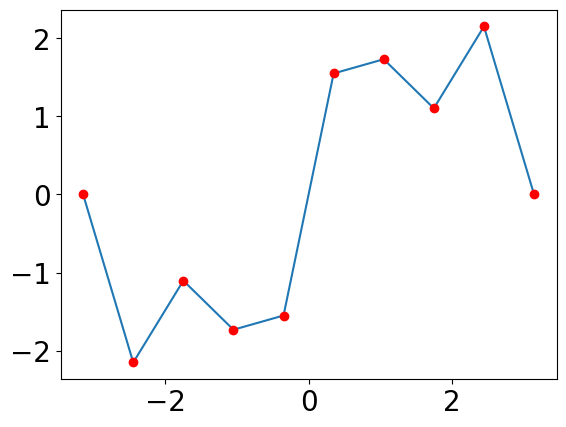

In [2]:
npoints = 10

xtrain = np.linspace(-np.pi,np.pi,npoints)
ytrain = 2*np.sin(xtrain)+ np.sin(3*xtrain)

fig = plt.figure()
ax = fig.gca()
cs = ax.plot(xtrain, ytrain)
cs = ax.plot(xtrain, ytrain,'ro',label='Samples')


## Kernel Regression

Kernel regression evaluates the samples at a specific test data point $z$ as
 $$y_{\rm pred}(z) = \mathbf w^T \mathbf k(z),$$

where $$\mathbf w = (\mathbf K_{\rm train}+ \lambda \mathbf I)^{-1} \mathbf y$$ and $$k(z) = \begin{bmatrix}k(z,x[0])\\k(z,x[1]\\\vdots\\k(z,x[N]))\end{bmatrix}$$. Here,
$$K_{\rm train} = \begin{bmatrix}k(x[0],x[0])&k(x[0],x[1])&\ldots&k(x[0],x[N]))\\
k(x[1],x[0])&k(x[1],x[1]&\ldots&k(x[1],x[N]))\\
&\vdots&\ldots&\vdots\\
k(x[N],x[0])&k(x[N],x[1])&\ldots&k(x[N],x[N]))\\
\end{bmatrix}$$

Here, $\mathbf x$ and $\mathbf y$ are the training data points.

<font color=red>Complete the `fit` and `predict` methods</font>

In [21]:
class PolynomialKernelRegression:
    def __init__(self,degree,lam):
        self.lam = lam
        self.w = None
        self.xtrain = None
        self.degree = degree

    def Kernel(self,x,y):
        inner = np.dot(x,y)
        k = (1+inner)**self.degree
        return k

    def fit(self,xtrain,ytrain):

        # YOUR CODE HERE
        kTrain = np.zeros((npoints, npoints)) # create an NxN matrix
        # Populate the matrix
        for i in range(npoints):
          for j in range(npoints):
            kTrain[i, j] = self.Kernel(xtrain[i], xtrain[j])

        self.w = np.linalg.inv(kTrain + self.lam * np.identity(npoints)) @ ytrain # = 0
        self.xtrain = xtrain # save parameter to object

    def predict(self,x):

        # YOUR CODE HERE
        kz = [self.Kernel(x, i) for i in xtrain] # create Kz
        prediction = np.transpose(self.w) @ kz # prediction equation
        return prediction


## Fitting and predicting the signal

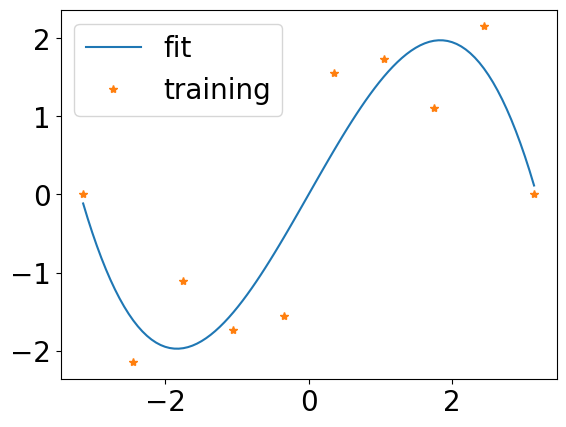

In [23]:
K = PolynomialKernelRegression(degree=3,lam=0.1)
K.fit(xtrain,ytrain)

xpred = np.linspace(-np.pi,np.pi,100)
ypred = np.zeros_like(xpred)

for i in range(len(xpred)):
    ypred[i] = K.predict(xpred[i])

plt.plot(xpred,ypred, label='fit')
plt.plot(xtrain,ytrain,'*', label='training')
plt.legend()


# Visualization of the computation

The inference at a specific point $z$ is computed as
 $$y_{\rm pred}(z) = \mathbf w^T \mathbf k(z)$$

Here, $k(z)$ is a vector of the size of the training data points, while the entries of $\mathbf w$ are the weights. The weights differ based on the specific curve to be approximated, and will be computed from the training data


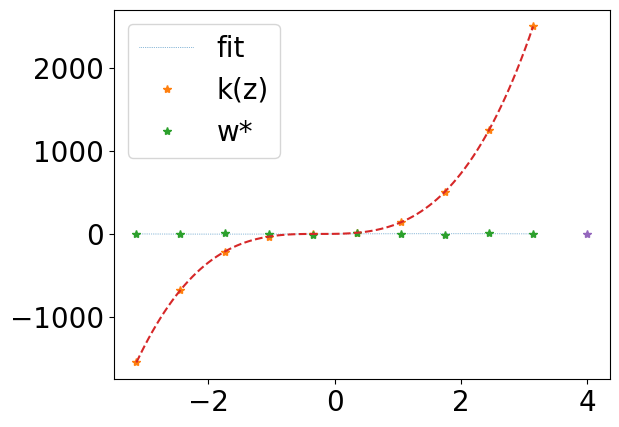

In [24]:
plt.plot(xpred,ypred,linestyle='dotted',linewidth=0.5, label='fit')
z = 4

ykernelAll = np.zeros_like(ypred)
for i in range(len(xpred)):
    ykernelAll[i] = K.Kernel(z,xpred[i])
ykernelTrain = np.zeros_like(ytrain)



for i in range(len(ytrain)):
    ykernelTrain[i] = K.Kernel(z,xtrain[i])
plt.plot(xtrain,ykernelTrain,'*', label='k(z)')
plt.plot(xtrain,K.w,'*', label='w*')

plt.plot(xpred,ykernelAll,linestyle='dashed')
plt.plot(z,1,'*')


#plt.plot(xtrain,ytrain,'*', label='training')
plt.legend()
